In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Ignoring warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [3]:
df = pd.read_csv('/kaggle/input/dataset/train.csv')
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


# exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [5]:
df.describe()

,toxic,abusive,vulgar,menace,offense,bigotry
count,23473.000000,23473.000000,23473.000000,23473.000000,23473.000000,23473.000000
mean,0.093554,0.007498,0.054318,0.002812,0.048992,0.008222
std,0.291214,0.086267,0.226648,0.052952,0.215857,0.090305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

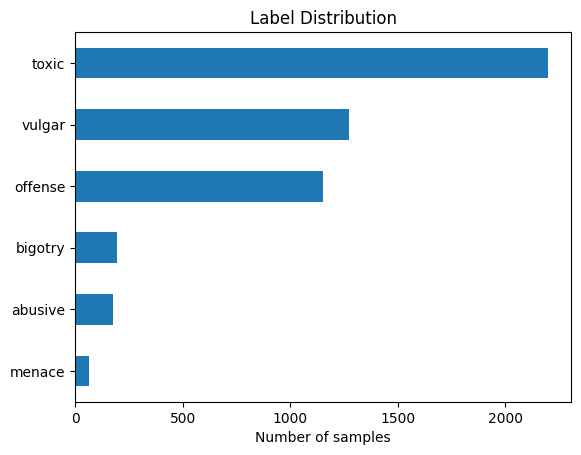

In [8]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
df[labels].sum().sort_values().plot(kind='barh', title='Label Distribution')
plt.xlabel("Number of samples")
plt.show()

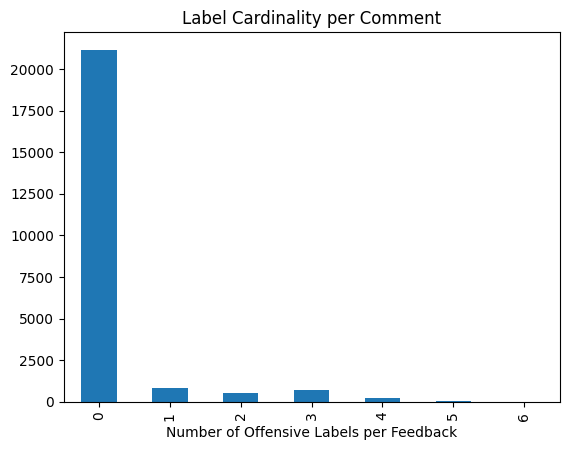

In [9]:
df['num_labels'] = df[labels].sum(axis=1)
df['num_labels'].value_counts().sort_index().plot(kind='bar', title='Label Cardinality per Comment')
plt.xlabel("Number of Offensive Labels per Feedback")
plt.show()

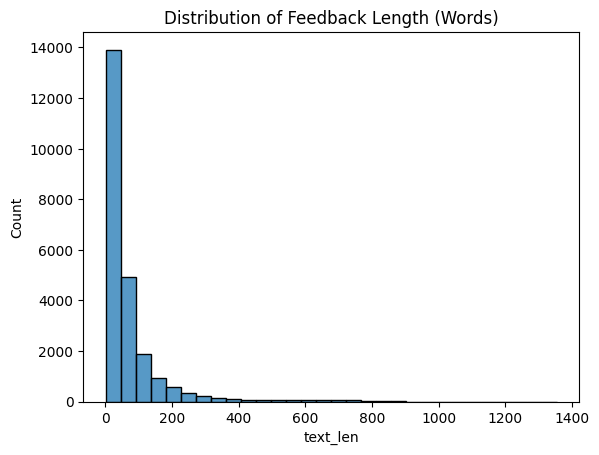

In [10]:
df['text_len'] = df['feedback_text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_len'], bins=30)
plt.title("Distribution of Feedback Length (Words)")
plt.show()

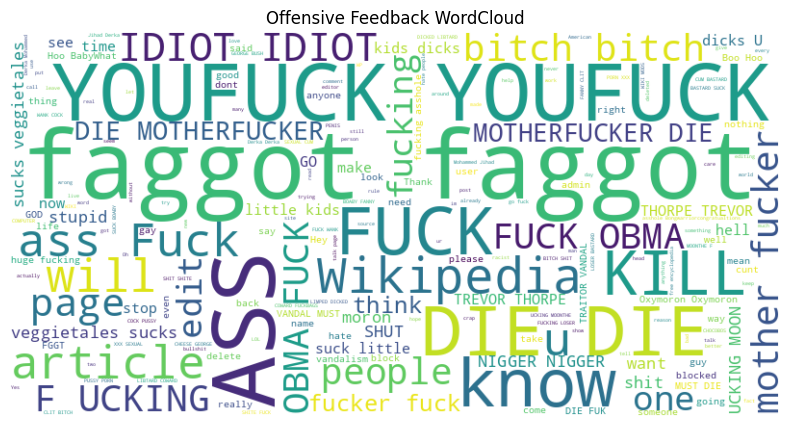

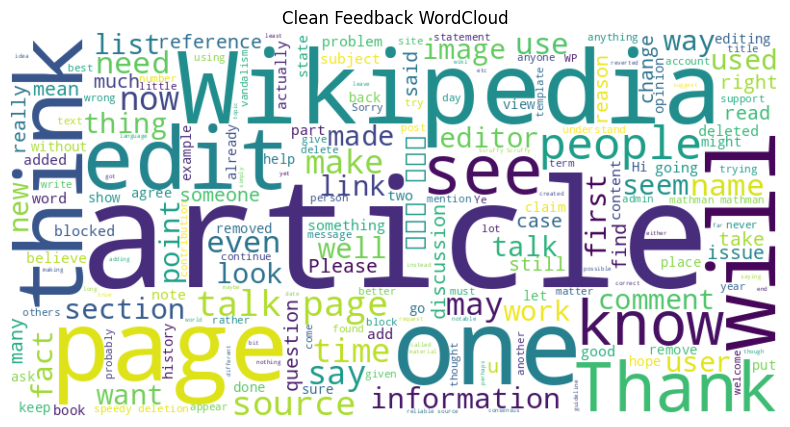

In [11]:
from wordcloud import WordCloud

def show_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Offensive
show_wordcloud(df[df['num_labels'] > 0]['feedback_text'], 'Offensive Feedback WordCloud')

# Clean
show_wordcloud(df[df['num_labels'] == 0]['feedback_text'], 'Clean Feedback WordCloud')


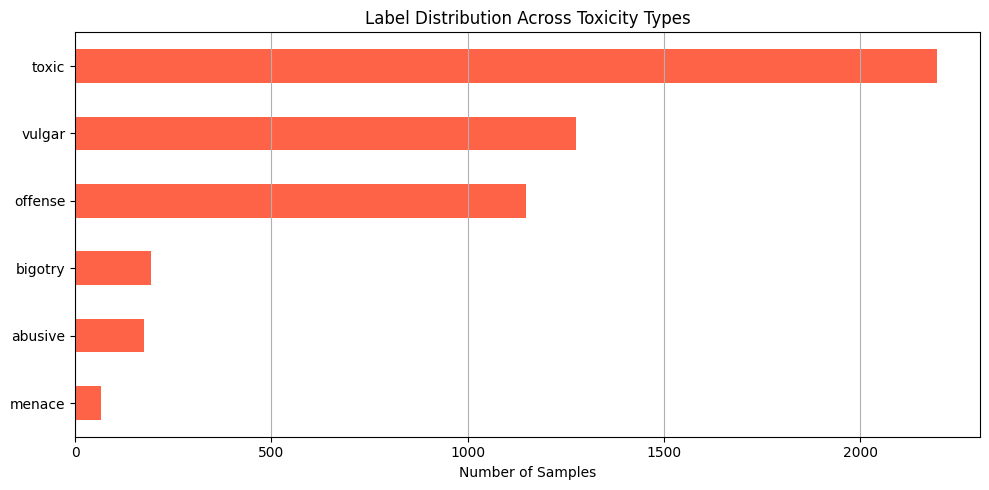

In [12]:
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']

plt.figure(figsize=(10,5))
df[labels].sum().sort_values(ascending=True).plot(kind='barh', color='tomato')
plt.title("Label Distribution Across Toxicity Types")
plt.xlabel("Number of Samples")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [13]:
df['char_count'] = df['feedback_text'].apply(lambda x: len(str(x)))
df['word_count'] = df['feedback_text'].apply(lambda x: len(str(x).split()))


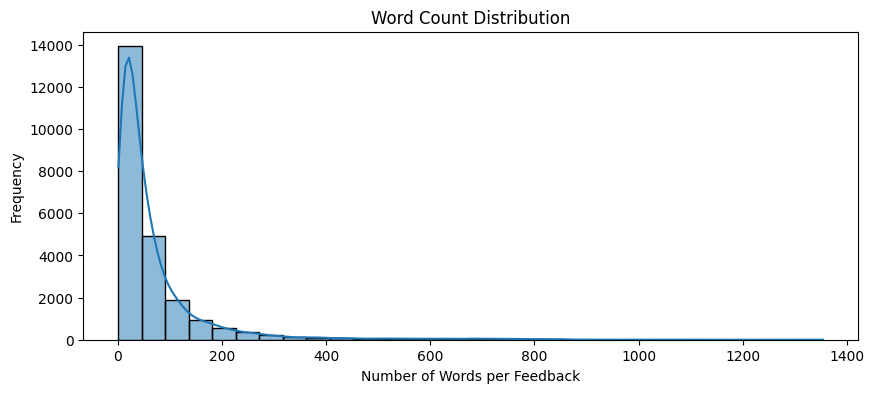

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words per Feedback")
plt.ylabel("Frequency")
plt.show()


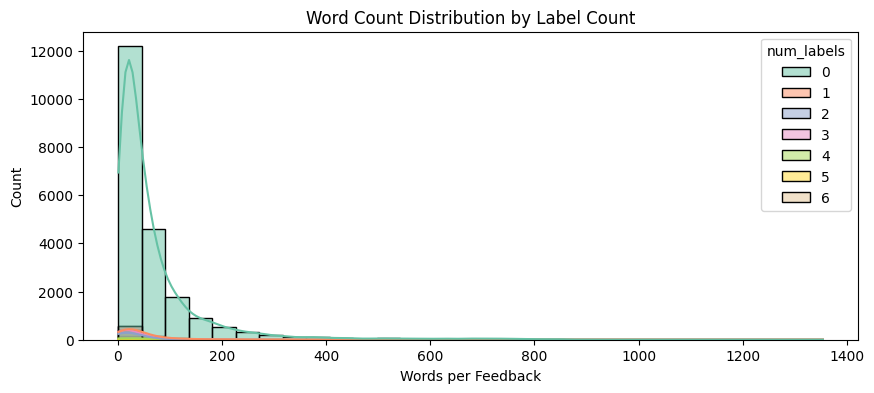

In [15]:
df['num_labels'] = df[labels].sum(axis=1)

plt.figure(figsize=(10,4))
sns.histplot(data=df, x='word_count', hue='num_labels', bins=30, kde=True, palette='Set2')
plt.title("Word Count Distribution by Label Count")
plt.xlabel("Words per Feedback")
plt.ylabel("Count")
plt.show()


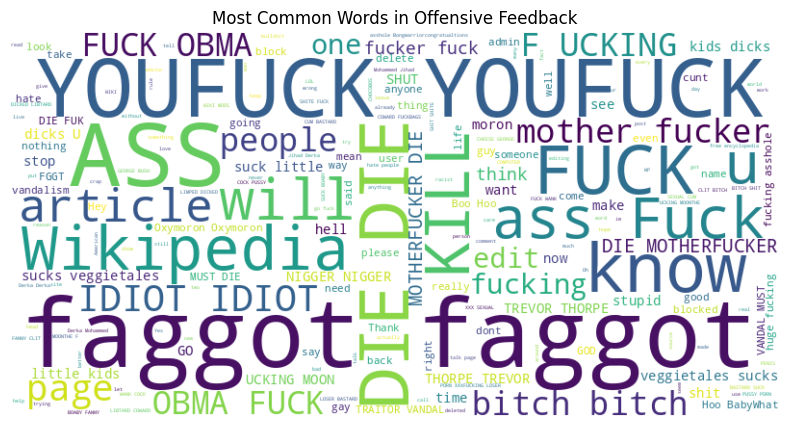

In [16]:
offensive_text = df[df['num_labels'] > 0]['feedback_text'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Offensive Feedback")
plt.show()


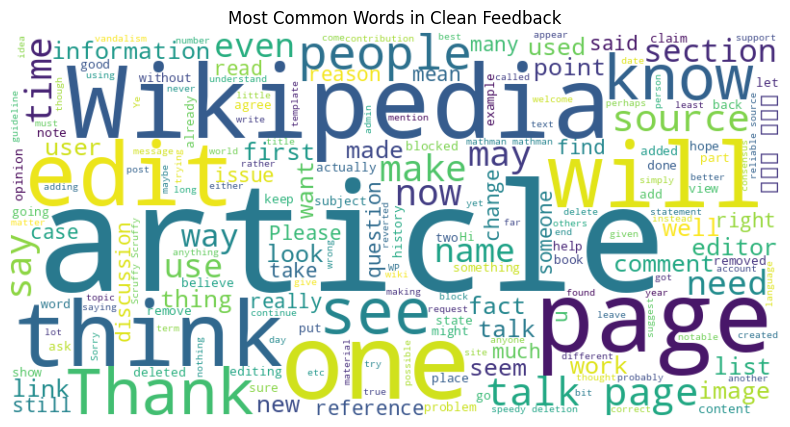

In [17]:
clean_text = df[df['num_labels'] == 0]['feedback_text'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Clean Feedback")
plt.show()


In [18]:
print(df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
num_labels       0
text_len         0
char_count       0
word_count       0
dtype: int64


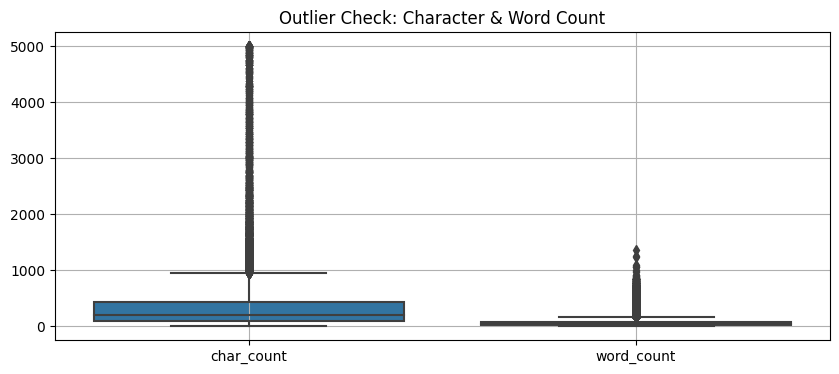

In [19]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['char_count', 'word_count']])
plt.title("Outlier Check: Character & Word Count")
plt.grid(True)
plt.show()


# Preprocessing

In [20]:
#df = df[df['word_count'] < 100]  # Example filter


In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, punctuation, numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(cleaned)


In [23]:
df['clean_text'] = df['feedback_text'].astype(str).apply(clean_text)


In [24]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...


In [25]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
df['tokens'] = df['clean_text'].apply(word_tokenize)


In [27]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text,tokens
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr,"[sound, good, let, know, youre, done, ill, sta..."
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...,"[say, something, didnt, actually, confirm, any..."
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...,"[agustina, barrientos, modelo, de, pieiro, jun..."
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...,"[fyi, enjoy, licking, stranger, scrotal, sacks..."
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...,"[get, site, many, penguin, asked, question, si..."


In [28]:
pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 46.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is inc

In [29]:
df = df.drop('id', axis=1)

In [30]:
df = df.drop('feedback_text', axis=1)

In [31]:
df.head()

,toxic,abusive,vulgar,menace,offense,bigotry,num_labels,text_len,char_count,word_count,clean_text,tokens
0,0,0,0,0,0,0,0,13,68,13,sound good let know youre done ill start pr,"[sound, good, let, know, youre, done, ill, sta..."
1,0,0,0,0,0,0,0,85,413,85,say something didnt actually confirm anything ...,"[say, something, didnt, actually, confirm, any..."
2,0,0,0,0,0,0,0,22,173,22,agustina barrientos modelo de pieiro jun cruz ...,"[agustina, barrientos, modelo, de, pieiro, jun..."
3,1,0,1,0,0,0,2,10,73,10,fyi enjoy licking stranger scrotal sacksespeci...,"[fyi, enjoy, licking, stranger, scrotal, sacks..."
4,0,0,0,0,0,0,0,88,432,88,get site many penguin asked question simple go...,"[get, site, many, penguin, asked, question, si..."


In [32]:
from gensim.models import Word2Vec

# Train Word2Vec on the tokens
w2v_model = Word2Vec(
    sentences=df['tokens'],    # Input: list of word lists
    vector_size=100,           # Output vector size for each word
    window=5,                  # Context window size
    min_count=1,               # Minimum word frequency to include
    workers=4,                 # CPU cores to use
    sg=1                       # Use skip-gram (sg=1), CBOW if sg=0
)

In [33]:
import numpy as np

def get_average_vector(tokens, model, dim=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(dim)

# Apply to all feedbacks
X = np.vstack(df['tokens'].apply(lambda x: get_average_vector(x, w2v_model)))


# input and target feature selection before feeding into model

In [34]:
target_cols = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
y = df[target_cols].values

In [35]:
import numpy as np

# Select additional features
extra_features = df[['text_len', 'char_count', 'word_count']].values

# Combine Word2Vec + extra features
X_combined = np.hstack([X, extra_features])  # final shape: (n_samples, 103)


# train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)


In [37]:
df.shape

(23473, 12)

# LogisticRegression and RandomForestClassifier baseline models

# Multiclass classification and classification report

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [39]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_cols))


              precision    recall  f1-score   support

       toxic       0.81      0.48      0.60       431
     abusive       0.33      0.09      0.15        32
      vulgar       0.77      0.47      0.59       249
      menace       0.00      0.00      0.00        20
     offense       0.71      0.33      0.45       230
     bigotry       0.50      0.05      0.10        38

   micro avg       0.77      0.40      0.53      1000
   macro avg       0.52      0.24      0.31      1000
weighted avg       0.73      0.40      0.52      1000
 samples avg       0.04      0.03      0.03      1000



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf = OneVsRestClassifier(rf)

clf_rf.fit(X_train, y_train)


OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [41]:
from sklearn.metrics import classification_report

y_pred = clf_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_cols))


              precision    recall  f1-score   support

       toxic       0.82      0.45      0.59       431
     abusive       0.38      0.09      0.15        32
      vulgar       0.82      0.45      0.58       249
      menace       1.00      0.05      0.10        20
     offense       0.84      0.37      0.51       230
     bigotry       0.00      0.00      0.00        38

   micro avg       0.82      0.40      0.53      1000
   macro avg       0.64      0.24      0.32      1000
weighted avg       0.78      0.40      0.52      1000
 samples avg       0.04      0.03      0.03      1000



# Toxic or non-toxic classification with reports

In [42]:
target_cols = ['toxic']
y = df[target_cols].values

import numpy as np

# Select additional features
extra_features = df[['abusive', 'vulgar', 'menace', 'offense', 'bigotry','text_len', 'char_count', 'word_count']].values

# Combine Word2Vec + extra features
X_combined = np.hstack([X, extra_features])  # final shape: (n_samples, 103)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
target_cols = ['non_toxic', 'toxic']  # Updated to include both classes
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_cols))

              precision    recall  f1-score   support

   non_toxic       0.97      0.99      0.98      4264
       toxic       0.90      0.66      0.76       431

    accuracy                           0.96      4695
   macro avg       0.93      0.83      0.87      4695
weighted avg       0.96      0.96      0.96      4695



In [43]:
target_cols = ['toxic']
y = df[target_cols].values

import numpy as np

# Select additional features
extra_features = df[['abusive', 'vulgar', 'menace', 'offense', 'bigotry','text_len', 'char_count', 'word_count']].values

# Combine Word2Vec + extra features
X_combined = np.hstack([X, extra_features])  # final shape: (n_samples, 103)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf = OneVsRestClassifier(rf)

clf_rf.fit(X_train, y_train)

from sklearn.metrics import classification_report
target_cols = ['non_toxic', 'toxic']  # Updated to include both classes
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_cols))

              precision    recall  f1-score   support

   non_toxic       0.97      0.99      0.98      4264
       toxic       0.90      0.66      0.76       431

    accuracy                           0.96      4695
   macro avg       0.93      0.83      0.87      4695
weighted avg       0.96      0.96      0.96      4695

